In [1]:
from citipy import citipy
from random import uniform
import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
import requests as req
import json
import seaborn as sns
from datetime import datetime as dt

In [2]:
def newpoint():
    return uniform(-90,90), uniform(-180,180)

points = []
points = (newpoint() for x in range(1500))
columns = ("Lat", "Lng")
City_df = pd.DataFrame([x for x in points], columns=columns)
City_df.head()

,Lat,Lng
0,77.456829,-68.188523
1,-19.665146,-107.725133
2,89.213659,-171.563856
3,-43.236750,25.891401
4,-29.904506,20.977323


In [23]:
City_df["City"] = ""
City_df["Country"] = ""
for index, row in City_df.iterrows():
    city = citipy.nearest_city(row['Lat'], row['Lng']).city_name
    country = citipy.nearest_city(row['Lat'], row['Lng']).country_code
    City_df.set_value(index, "City", city)
    City_df.set_value(index, "Country", country)
City_Sample = City_df.drop_duplicates(subset='City').sample(n=500).reset_index()
    
City_Sample["Temp"] = ""
City_Sample["Humidity"] = ""
City_Sample["Date"] = ""
City_Sample["Wind Speed"] = ""
City_Sample["Cloudiness"] = ""
del City_Sample['index']
City_Sample.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


,Lat,Lng,City,Country,Temp,Humidity,Date,Wind Speed,Cloudiness
0,59.607673,166.879813,tilichiki,ru,,,,,
1,-51.860881,24.354770,plettenberg bay,za,,,,,
2,0.702120,164.685830,bairiki,ki,,,,,
3,18.387177,-158.146512,lahaina,us,,,,,
4,26.669271,-172.322868,kapaa,us,,,,,
5,16.162721,102.492384,kaeng khlo,th,,,,,
6,21.006766,12.039408,bilma,ne,,,,,
7,-17.521659,144.403012,atherton,au,,,,,
8,-24.562795,-95.751486,pisco,pe,,,,,
9,12.045573,-62.864491,gouyave,gd,,,,,


In [26]:
api_key = "c5714c323dda46f5e44b1bfdb0fe341c"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

In [40]:
counter = 0
for index, row in City_Sample.iterrows():
    try:
        target_url = "http://api.openweathermap.org/data/2.5/weather?units=%s&APPID=%s&q=%s" % (units,api_key, row['City'])
        cities_data = req.get(target_url).json()
        City_Sample.set_value(index, "Temp", cities_data["main"]["temp_max"])
        City_Sample.set_value(index, "Humidity", cities_data["main"]["humidity"])
        City_Sample.set_value(index, "Date", cities_data["dt"])
        City_Sample.set_value(index, "Wind Speed", cities_data["wind"]["speed"])
        City_Sample.set_value(index, "Cloudiness", cities_data["clouds"]["all"])
        counter = counter + 1
    except (AttributeError, KeyError) as e:
        pass

    print("------------------------")
    print("Proceesing Record : " , counter)
    print(target_url)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Re

------------------------
Proceesing Record :  1
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=tilichiki
------------------------
Proceesing Record :  2
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=plettenberg bay
------------------------
Proceesing Record :  2
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=bairiki
------------------------
Proceesing Record :  3
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=lahaina
------------------------
Proceesing Record :  4
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=kapaa
------------------------
Proceesing Record :  4
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=kaeng khlo
------------------------
Proceesing

------------------------
Proceesing Record :  48
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=sambava
------------------------
Proceesing Record :  49
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=norfolk
------------------------
Proceesing Record :  50
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=kosjeric
------------------------
Proceesing Record :  51
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=kedrovyy
------------------------
Proceesing Record :  52
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=san quintin
------------------------
Proceesing Record :  53
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=hofn
------------------------
Proceesing R

------------------------
Proceesing Record :  97
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=folldal
------------------------
Proceesing Record :  98
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=comodoro rivadavia
------------------------
Proceesing Record :  99
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=potosi
------------------------
Proceesing Record :  100
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=waipawa
------------------------
Proceesing Record :  101
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=inyonga
------------------------
Proceesing Record :  102
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=kirkwood
------------------------
P

------------------------
Proceesing Record :  145
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=porto novo
------------------------
Proceesing Record :  146
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=torbay
------------------------
Proceesing Record :  147
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=garissa
------------------------
Proceesing Record :  148
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=deputatskiy
------------------------
Proceesing Record :  149
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=perugia
------------------------
Proceesing Record :  150
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=gazojak
------------------------
Pro

------------------------
Proceesing Record :  193
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=mount gambier
------------------------
Proceesing Record :  194
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=gurlan
------------------------
Proceesing Record :  195
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=yenagoa
------------------------
Proceesing Record :  196
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=salima
------------------------
Proceesing Record :  197
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=knysna
------------------------
Proceesing Record :  198
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=meulaboh
------------------------
Proce

------------------------
Proceesing Record :  237
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=tigil
------------------------
Proceesing Record :  238
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=bloomsburg
------------------------
Proceesing Record :  239
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=mawlaik
------------------------
Proceesing Record :  240
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=bundaberg
------------------------
Proceesing Record :  241
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=bandarbeyla
------------------------
Proceesing Record :  241
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=chagda
------------------------
Pro

------------------------
Proceesing Record :  284
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=winnemucca
------------------------
Proceesing Record :  285
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=coahuayana
------------------------
Proceesing Record :  286
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=kloulklubed
------------------------
Proceesing Record :  287
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=sultanpur
------------------------
Proceesing Record :  288
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=mosquera
------------------------
Proceesing Record :  289
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=arraial do cabo
-------------

------------------------
Proceesing Record :  333
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=mhlambanyatsi
------------------------
Proceesing Record :  333
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=ha
------------------------
Proceesing Record :  334
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=bafq
------------------------
Proceesing Record :  335
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=vao
------------------------
Proceesing Record :  336
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=puerto asis
------------------------
Proceesing Record :  337
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=beira
------------------------
Proceesing Re

------------------------
Proceesing Record :  372
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=pauini
------------------------
Proceesing Record :  372
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=amderma
------------------------
Proceesing Record :  373
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=seabra
------------------------
Proceesing Record :  374
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=port hardy
------------------------
Proceesing Record :  375
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=belvedere marittimo
------------------------
Proceesing Record :  376
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=keetmanshoop
----------------

------------------------
Proceesing Record :  417
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=amboasary
------------------------
Proceesing Record :  418
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=basoko
------------------------
Proceesing Record :  419
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=road town
------------------------
Proceesing Record :  420
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=yulara
------------------------
Proceesing Record :  421
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=svetlogorsk
------------------------
Proceesing Record :  422
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c5714c323dda46f5e44b1bfdb0fe341c&q=fortuna
------------------------
Pro

In [56]:
City_Sample = City_Sample.replace('', np.NaN)
City_Sample.head()

,Lat,Lng,City,Country,Temp,Humidity,Date,Wind Speed,Cloudiness
0,59.607673,166.879813,tilichiki,ru,50.70,86.0,1.529790e+09,3.87,68.0
1,-51.860881,24.354770,plettenberg bay,za,61.59,96.0,1.529790e+09,27.13,12.0
2,0.702120,164.685830,bairiki,ki,NaN,NaN,NaN,NaN,NaN
3,18.387177,-158.146512,lahaina,us,84.20,51.0,1.529787e+09,13.87,20.0
4,26.669271,-172.322868,kapaa,us,84.20,66.0,1.529787e+09,18.34,40.0


In [58]:
City_Sample.to_csv('/Users/joshreel/DU/homework/hw6/data.csv', index=False)


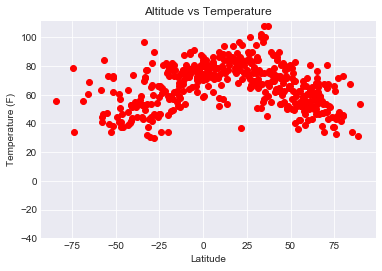

In [50]:
# Build a scatter plot for lat / temp
plt.scatter(City_Sample["Lat"], City_Sample["Temp"], marker="o", color = 'red')

plt.title("Altitude vs Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-40, 120, 20))
plt.grid(True)
sns.set_style('darkgrid')

plt.savefig("TempvsLat.png")
plt.show()

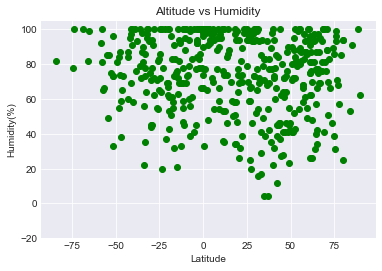

In [51]:
# Build a scatter plot for lat / humidity
plt.scatter(City_Sample["Lat"], City_Sample["Humidity"], marker="o", color = 'green')

plt.title("Altitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-20, 120, 20))
sns.set_style('darkgrid')

plt.savefig("HumidvsLat.png")
plt.show()


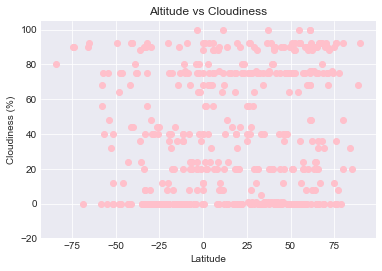

In [54]:
# Build a scatter plot for lat / cloudiness
plt.scatter(City_Sample["Lat"], City_Sample["Cloudiness"], marker="o", color = 'pink')

plt.title("Altitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.yticks(np.arange(-20, 120, 20))
sns.set_style('darkgrid')

plt.savefig("CloudvsLat.png")
plt.show()

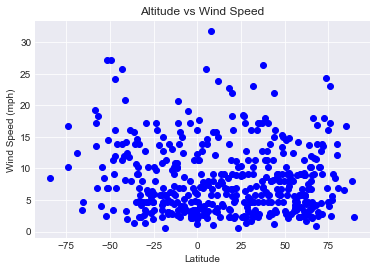

In [53]:
# Build a scatter plot for lat / wind speed
plt.scatter(City_Sample["Lat"], City_Sample["Wind Speed"], marker="o", color = 'blue')

plt.title("Altitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

sns.set_style('darkgrid')

plt.savefig("WindvsLat.png")
plt.show()

3 Observable Trends:
1. Cities closest to the equator tend to be warmer.
2. Humidity typically ranges between 65 to 100.
3. Wind speed typically ranges between 2 to 7 mph.
